In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import pydotplus
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import GammaRegressor

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:/Users/91820/Desktop/Main-IPL/ipl.csv")


In [4]:
df.drop(columns=['mid','striker','non-striker','batsman','bowler'], inplace=True)
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [5]:
df.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [6]:
# Keeping only consistent teams
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [7]:
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

In [8]:
df['bat_team'] = np.where(df.bat_team == 'Delhi Daredevils' , 'Delhi Capitals' , df.bat_team)
df['bowl_team'] = np.where(df.bowl_team == 'Delhi Daredevils' , 'Delhi Capitals' , df.bowl_team)

In [9]:
df['venue'] = np.where(df.venue == '''St George's Park''' , 'St George Park' , df.venue)

In [10]:
df.venue.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'MA Chidambaram Stadium, Chepauk', 'Eden Gardens',
       'Dr DY Patil Sports Academy', 'Newlands', 'St George Park',
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera',
       'Himachal Pradesh Cricket Association Stadium',
       'Subrata Roy Sahara Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Barabati Stadium', 'Maharashtra Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Punjab Cricket Association IS Bind

In [11]:
consistent_venues = ['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla', 'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'MA Chidambaram Stadium, Chepauk', 'Eden Gardens', 'Dr DY Patil Sports Academy', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Himachal Pradesh Cricket Association Stadium', 'Subrata Roy Sahara Stadium',
       'Rajiv Gandhi International Stadium, Uppal', 'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Barabati Stadium', 'Maharashtra Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium', 'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Holkar Cricket Stadium', 'Vidarbha Cricket Association Stadium, Jamtha', 'Nehru Stadium',
       'Saurashtra Cricket Association Stadium']

In [12]:
df = df[(df['venue'].isin(consistent_venues))]

In [13]:
df['venue'] = np.where(df.venue == 'Punjab Cricket Association IS Bindra Stadium, Mohali' , 'Punjab Cricket Association Stadium, Mohali' , df.venue)

In [14]:
df.venue.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'MA Chidambaram Stadium, Chepauk', 'Eden Gardens',
       'Dr DY Patil Sports Academy', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera',
       'Himachal Pradesh Cricket Association Stadium',
       'Subrata Roy Sahara Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Barabati Stadium',
       'Maharashtra Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Holkar Cricket Stadium'], dtype=object)

In [15]:
df = df[df.overs >= 5.0]

In [16]:
df.head(10)

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222
37,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.6,58,1,222
38,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,62,1,6.1,55,1,222
39,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,63,1,6.2,52,1,222
40,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,64,1,6.3,47,1,222
41,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,66,1,6.4,45,1,222


In [17]:
df.dtypes

date               object
venue              object
bat_team           object
bowl_team          object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
total               int64
dtype: object

In [18]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [19]:
df.dtypes

date              datetime64[ns]
venue                     object
bat_team                  object
bowl_team                 object
runs                       int64
wickets                    int64
overs                    float64
runs_last_5                int64
wickets_last_5             int64
total                      int64
dtype: object

In [20]:
# --- Data Preprocessing ---
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['venue' , 'bat_team', 'bowl_team'])

In [21]:
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'venue_Barabati Stadium', 'venue_Brabourne Stadium',
       'venue_Dr DY Patil Sports Academy',
       'venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'venue_Eden Gardens', 'venue_Feroz Shah Kotla',
       'venue_Himachal Pradesh Cricket Association Stadium',
       'venue_Holkar Cricket Stadium',
       'venue_JSCA International Stadium Complex',
       'venue_M Chinnaswamy Stadium', 'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Maharashtra Cricket Association Stadium',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Sardar Patel Stadium, Motera', 'venue_Sawai Mansingh Stadium',
       'venue_Shaheed Veer Narayan Singh International Stadium',
       'venue_Subrata Roy Sahara Stadium', 'venue_Wankhede Stadium',
       'bat_team_Chennai Super Kings', 'bat_team_Delhi Capitals',
       'b

In [22]:
# rearranging order of encoded_df
encoded_df = encoded_df[['date', 
         
       'bat_team_Chennai Super Kings', 'bat_team_Delhi Capitals','bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
         
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Capitals',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad',
         
       'venue_Barabati Stadium', 'venue_Brabourne Stadium',
       'venue_Dr DY Patil Sports Academy',
       'venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'venue_Eden Gardens', 'venue_Feroz Shah Kotla',
       'venue_Himachal Pradesh Cricket Association Stadium',
       'venue_Holkar Cricket Stadium',
       'venue_JSCA International Stadium Complex',
       'venue_M Chinnaswamy Stadium', 'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Maharashtra Cricket Association Stadium',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Sardar Patel Stadium, Motera', 'venue_Sawai Mansingh Stadium',
       'venue_Shaheed Veer Narayan Singh International Stadium',
       'venue_Subrata Roy Sahara Stadium', 'venue_Wankhede Stadium',
         
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total']]

In [23]:
df.corr()

,runs,wickets,overs,runs_last_5,wickets_last_5,total
runs,1.000000,0.368687,0.881995,0.590722,0.115897,0.388007
wickets,0.368687,1.000000,0.640354,-0.185812,0.640786,-0.444663
overs,0.881995,0.640354,1.000000,0.299106,0.227641,0.030135
runs_last_5,0.590722,-0.185812,0.299106,1.000000,-0.276055,0.581660
wickets_last_5,0.115897,0.640786,0.227641,-0.276055,1.000000,-0.303610
total,0.388007,-0.444663,0.030135,0.581660,-0.303610,1.000000


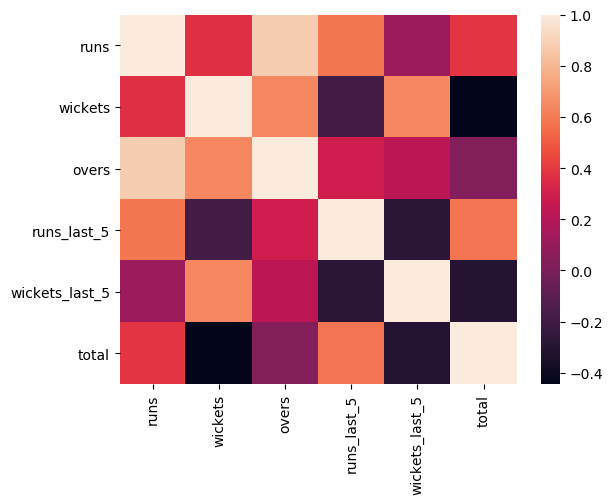

In [24]:
import seaborn as sns
sns.heatmap(df.corr())

In [25]:
# Splitting the data into train and test set
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]

In [26]:
y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

In [27]:
# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import time

# Create polynomial features
degree = 2  # You can adjust the degree based on your needs
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train the model
start = time.time()
polyreg.fit(X_train_scaled, y_train)
end = time.time()
total_time_poly = end - start

# Make predictions and evaluate
y_pred_poly = polyreg.predict(X_test_scaled)

print('accuracy (polynomial regression): ', polyreg.score(X_test_scaled, y_test))
print('time : ', total_time_poly)



accuracy (polynomial regression):  -1.688712988727853e+22
time :  3.1240530014038086


In [29]:
alg2 = RandomForestRegressor(n_estimators=60)

start = time.time()
alg2.fit(X_train , y_train)
end = time.time()
total_time2 = end - start

y_pred2 = alg2.predict(X_test)

print('accuracy : ', alg2.score(X_test , y_test))
print('time : ' , total_time2)

accuracy :  0.5943152812512025
time :  5.78912353515625


In [30]:
alg3 = DecisionTreeRegressor(max_depth=6)
start = time.time()
alg3.fit(X_train , y_train)
end = time.time()
total_time3 = end - start

y_pred3 = alg3.predict(X_test)

print('accuracy : ', alg3.score(X_test , y_test))
print('time : ' , total_time3)

accuracy :  0.6328826084925543
time :  0.07594847679138184


In [31]:
alg4 = TheilSenRegressor()

start = time.time()
alg4.fit(X_train , y_train)
end = time.time()
total_time4 = end - start

y_pred4 = alg4.predict(X_test)

print('accuracy : ', alg4.score(X_test , y_test))
print('time : ' , total_time4)

accuracy :  0.710437308802489
time :  8.835743188858032


In [32]:
alg5 = HuberRegressor()

start = time.time()
alg5.fit(X_train , y_train)
end = time.time()
total_time5 = end - start

y_pred5 = alg5.predict(X_test)

print('accuracy : ', alg5.score(X_test , y_test))
print('time : ' , total_time5)

accuracy :  0.6408338071824211
time :  1.0355610847473145


In [33]:
alg6 = GammaRegressor()

start = time.time()
alg6.fit(X_train , y_train)
end = time.time()
total_time6 = end - start

y_pred6 = alg6.predict(X_test)

print('accuracy : ', alg6.score(X_test , y_test))
print('time : ' , total_time6)

accuracy :  0.6351269924611211
time :  0.36081695556640625


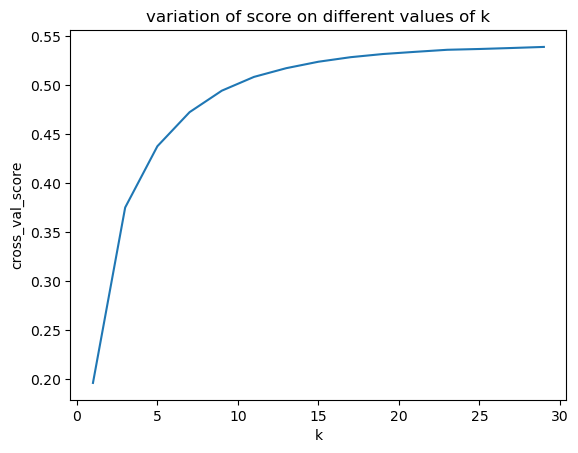

In [34]:
x_axis = []
y_axis = []

for k in range(1, 30, 2):
    clf = KNeighborsRegressor(n_neighbors = k)
    score = cross_val_score(clf, X_train, y_train, cv = KFold(n_splits=5))
    x_axis.append(k)
    y_axis.append(score.mean())

plt.plot(x_axis, y_axis)
plt.xlabel("k")
plt.ylabel("cross_val_score")
plt.title("variation of score on different values of k")
plt.show()

In [35]:
alg7 = KNeighborsRegressor(n_neighbors=25, weights='distance', algorithm='auto', p=2, metric='minkowski')

start = time.time()
alg7.fit(X_train, y_train)
end = time.time()
total_time7 = end - start

y_pred7 = alg7.predict(X_test)

print('accuracy : ', alg7.score(X_test , y_test))
print('time : ' , total_time7)

accuracy :  0.6516448498858334
time :  0.0018584728240966797


In [40]:
alg8 = SVR()

start = time.time()
alg8.fit(X_train, y_train)
end = time.time()
total_time8 = end - start

y_pred8 = alg8.predict(X_test)

print('accuracy : ', alg8.score(X_test , y_test))
print('time : ' , total_time8)

accuracy :  0.6225217912992249
time :  51.04073405265808


In [36]:
alg9 = LinearSVR()

start = time.time()
alg9.fit(X_train, y_train)
end = time.time()
total_time9 = end - start

y_pred9 = alg9.predict(X_test)

print('accuracy : ', alg9.score(X_test , y_test))
print('time : ' , total_time9)

accuracy :  0.6771758903847898
time :  2.0228755474090576


In [37]:
ridge = Ridge()

parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
alg10=GridSearchCV(ridge,parameters)

start = time.time()
alg10.fit(X_train, y_train)
end = time.time()
total_time10 = end - start

y_pred10 = alg10.predict(X_test)

print('accuracy : ', alg10.score(X_test , y_test))
print('time : ' , total_time10)

accuracy :  0.7425654959059165
time :  1.7528469562530518


In [41]:
test = np.array([1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,60,3,7,40,2]).reshape(1,-1)

print('alg1 : ' , alg1.predict(test))
print('alg2 : ' , alg2.predict(test))
print('alg3 : ' , alg3.predict(test))
print('alg4 : ' , alg4.predict(test))
print('alg5 : ' , alg5.predict(test))
print('alg6 : ' , alg6.predict(test))
print('alg7 : ' , alg7.predict(test))
print('alg8 : ' , alg8.predict(test))
print('alg9 : ' , alg9.predict(test))
print('alg10 :' , alg10.predict(test))

alg1 :  [-4.73977402e+12]
alg2 :  [164.45]
alg3 :  [165.5186722]
alg4 :  [167.87712687]
alg5 :  [161.47298855]
alg6 :  [160.61000324]
alg7 :  [168.44798505]
alg8 :  [164.55910805]
alg9 :  [165.6147306]
alg10 : [166.90202055]


In [42]:
df_model=pd.DataFrame({
'Model_Applied':['Linear_Regression', 'Random_Forest', 'Decision_tree', 'TheilSen_Regression', 'Huber_Regression', 
                 'Gamma_regreesor', 'KNN', 'SVR', 'Linear_SVR', 'Ridge_Regreesion'],
'Accuracy':[alg1.score(X_test,y_test), alg2.score(X_test,y_test), alg3.score(X_test,y_test), alg4.score(X_test,y_test),
            alg5.score(X_test,y_test), alg6.score(X_test,y_test), alg7.score(X_test,y_test), alg8.score(X_test,y_test),
            alg9.score(X_test,y_test), alg10.score(X_test,y_test)],
'Training_Time':[total_time1, total_time2, total_time3, total_time4, total_time5, total_time6, total_time7, total_time8, 
                 total_time9, total_time10]})

In [43]:
df_model

,Model_Applied,Accuracy,Training_Time
0,Linear_Regression,-1.329777e+23,0.051689
1,Random_Forest,5.943153e-01,5.789124
2,Decision_tree,6.328826e-01,0.075948
3,TheilSen_Regression,7.104373e-01,8.835743
4,Huber_Regression,6.408338e-01,1.035561
5,Gamma_regreesor,6.351270e-01,0.360817
6,KNN,6.516448e-01,0.001858
7,SVR,6.225218e-01,51.040734
8,Linear_SVR,6.771759e-01,2.022876
9,Ridge_Regreesion,7.425655e-01,1.752847


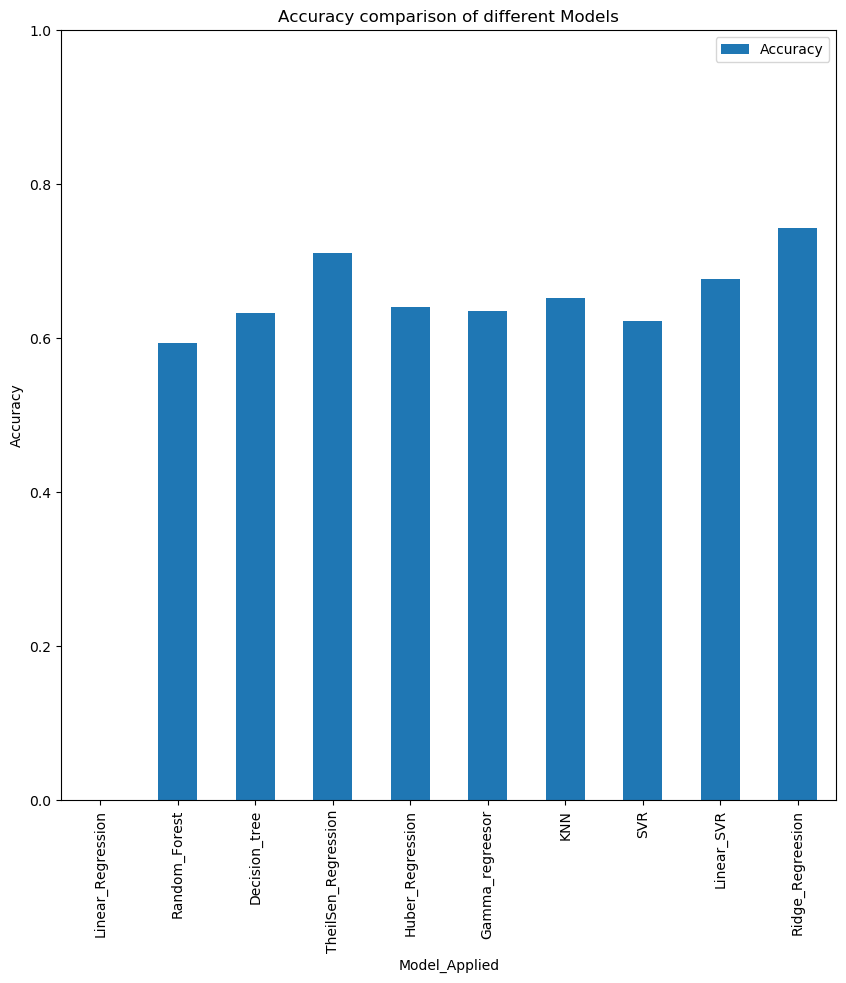

In [45]:
import matplotlib.pyplot as plt

# Your existing code here

plt.figure(figsize=(10, 10))
df_model.plot(kind='bar', x='Model_Applied', ylim=[0, 1], y='Accuracy', ax=plt.gca())
plt.ylabel('Accuracy')
plt.title('Accuracy comparison of different Models')
plt.show()


<Figure size 1000x1000 with 0 Axes>

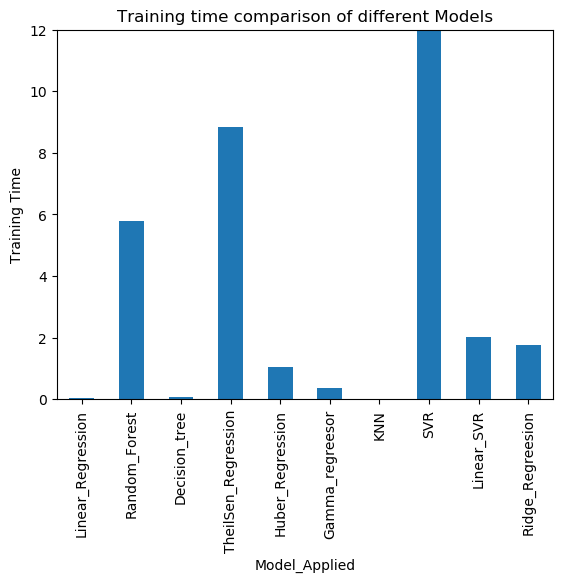

In [47]:
# Your existing code here

plt.figure(figsize=(10, 10))
ax = df_model.plot(kind='bar', x='Model_Applied', ylim=[0, 12], y='Training_Time', legend=False)
ax.set_ylabel('Training Time')
ax.set_title('Training time comparison of different Models')
plt.show()


In [1]:
import pickle as pkl

# List of your algorithms
algorithms = [alg1, alg2, alg3, alg4, alg5, alg6, alg7, alg8, alg9, alg10]

# Save each algorithm
for i, alg in enumerate(algorithms, start=1):
    with open(f'model{i}.pkl', 'wb') as f:
        pkl.dump(alg, f)

# Load each algorithm
loaded_models = []
for i in range(1, 11):
    with open(f'model{i}.pkl', 'rb') as f:
        loaded_models.append(pkl.load(f))

# Now, loaded_models is a list containing all your loaded models


NameError: name 'alg1' is not defined